First 5 rows of dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  

Dataset Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.84615

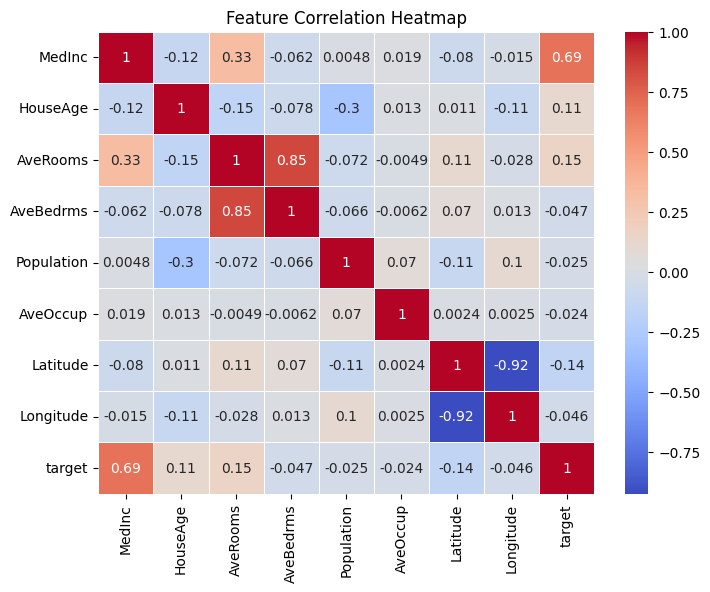

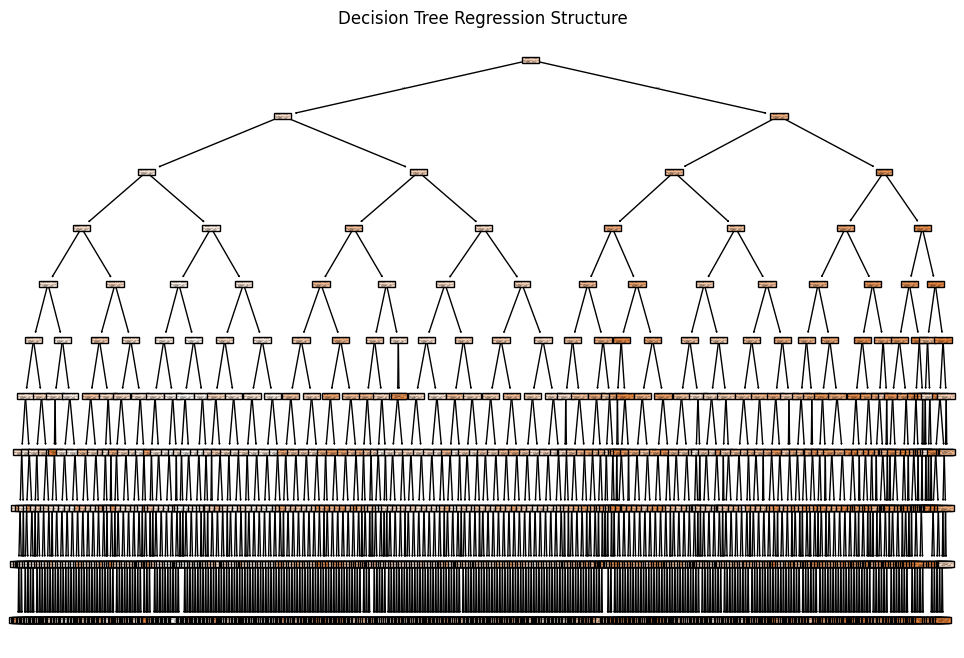

Accuracy metrics on test data

Mean Squared Error (MSE): 0.4154681981618525
Mean Absolute Error (MAE): 0.4332031802610876
R-squared Score (R2): 0.6829476865157171


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Load the Dataset (Boston Housing Dataset)
california = datasets.fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['target'] = california.target

# Step 2: Exploratory Data Analysis (EDA)
print("First 5 rows of dataset:")
print(df.head())

print("\nDataset Summary:")
print(df.describe())

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Step 3: Splitting the Dataset into Train and Test
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=5, random_state=42)
dt_regressor.fit(X_train, y_train)

# Step 5: Visualizing the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_regressor, feature_names=california.feature_names, filled=True)
plt.title("Decision Tree Regression Structure")
plt.show()

# Step 6: Model Evaluation
y_pred = dt_regressor.predict(X_test)
print("Accuracy metrics on test data")
print("\nMean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R-squared Score (R2):", r2_score(y_test, y_pred))
